## Week3_Day4_MachineLearning(I)

### Outline

- Scikit-Learning Library
- Machine Learning Steps
- Supervised classification methods.

This week's lesson contains an excerpt (Section 0) from:  
- [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas

## 0. The Scikit-Learn Library

The library we are using for machine learning is the well-known scikit-learn. 
Fortunately, it comes with Anaconda, so if we installed Python with the Anaconda Distributor, we do not need to install scikit-learning seperately.

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities. Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward. 

The website (https://scikit-learn.org/stable/) of scikit-learn provides very instructive examples and tutorials for further learning.

In [5]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_context(context='paper')

from numpy.random import seed
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

## 0.1 Data Representation in Scikit-Learn

The best way to think about data within Scikit-Learn is in terms of tables of data.

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

In [6]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here, each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as **samples**, and the number of rows as **`n_samples`**.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as **features**, and the number of columns as **`n_features`**.

#### Features matrix

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the *features matrix*.

**By convention, this features matrix is often stored in a variable named ``X``.
The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``**, and is most often contained in a NumPy array or a Pandas ``DataFrame``.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

#### Target array
**In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.**
The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array or Pandas ``Series``.
The target array may have continuous numerical values, or discrete classes/labels.

the target array is the quantity we want to *predict from the data*. in statistical terms, it is the dependent variable.
For example, we may wish to construct a model that can predict the species of flower based on the other measurements; so, the ``species`` column would be considered the target array.

To summarize, the expected layout of features and target values is visualized in the following diagram:

![](https://www.dropbox.com/s/6hmyaho75q5iwcb/05.02-samples-features.png?dl=1)

## 1. K-Nearest Neighbors Example
In this exercise, let's train a machine learning model with k-nearest neighbors algorithm.

### 1.1 Load data
Scikit-learn provides many example datasets which you can use to test your codes and models. You can find information in https://scikit-learn.org/stable/datasets.html. Here we first use an toy dataset from scikit-learn to build a machine learning model.

We are using a hand-written digits dataset, which contains images of digits. It can be loaded by load_digits function from the module sklearn.datasets. Note that the loaded dataset variable is a **Bunch** object, which is a class of scikit-learn and is similar with dict.

In [89]:
# Import the load_digits function from the sklearn.datasets module.
from sklearn.datasets import load_digits

# Load the digits dataset.
digits = load_digits()

type(digits)

sklearn.utils._bunch.Bunch

We can check the description of the dataset by printing the .DESCR attribute. Note that the sample size is 1797 and there are 64 features. The 64 is from the 8-by-8 size of images, so each feature is simply the "pixel intensity" taking values in the range 0-16 and representing the grayscale shades from white (0) to black (16).

In [135]:
# description of the dataset, 
# including meta, the data format, and references.


### 1.2 Exploring data
We can get access to the data by `.data attribute`. This is an array. We can check its shape by `.shape`. As it shows, there are 1,797 rows (number of samples) and 64 columns (features).

In [136]:
# get access to the data (features)


In [137]:
# get access to the shape of the data (features)


We can also get the data labels (the target we want to use the machine learning model to predict) by `.target` attributes. In this dataset, the labels are the numbers (classes) each image represents. Hence, the shape of the target has only one dimension and is the same with the number of rows of the data.

In [138]:
# # get access to the data (target)


In [139]:
# get the shape of the target data


This dataset contains the image data as well. We can get access to each image by `.images`. Say we want to check the image of the 5th sample.

In [140]:
# check the image of the 5th sample


We can plot this image by `.imshow()` function in matplotlib.pyplot. We also specify the "cmap" to be "plt.cm.gray_r" in order to use a color map enabling us to display the image's pixels in grayscale.

In [141]:
plt.figure(figsize=(5, 3))

# display the image



<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

We can plot for the first tem images.

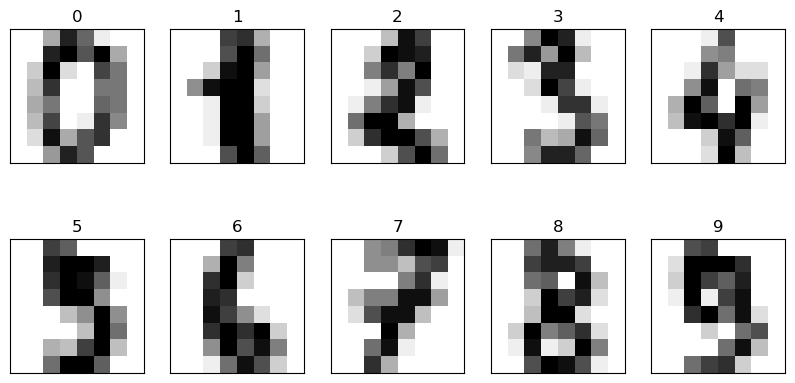

In [21]:
fig, ax = plt.subplots(2, 5, figsize = (10, 5))

# arrange the images as a 2 by 5 matrix
for i in range(10): # //: Integer Division; %: reminder
    ax[i//5, i%5].imshow(digits.images[i], cmap = plt.cm.gray_r)
    ax[i//5, i%5].set_xticks([])
    ax[i//5, i%5].set_yticks([])
    ax[i//5, i%5].set_title(digits.target[i])

### 1.3 Transforming data
Machine learning algorithms in Scikit-learn require the data to be prepared in a good shape.
- Samples' values are all floating-points (at least numeric).
- Samples are stored in a two-dimensional array or array-like collection, such as a pandas DataFrame
- Each row represent a sample
- Each column in a row represents a feature of the row sample
  
The current digits dataset meets all requirements, thus we do not need to transform any sample or feature. Scikit-learn provides `sklearn.preprocessing` module in case you need to convert your data.

### 1.4 Splitting data for training and testing
We typically use a subset of the data to train the model and set aside a portion of the data for testing. Thus, we need to split the data into a "training set" and a "testing set". 
- The function `.train_test_split()` from sklearn.model_selection helps to shuffle and randomly select the two sets.

Since our data values (digits.data) and the labels (digits.target) are stored seperately, we should put them together into the `.train_test_split()` function. And the function would return four elements (training and testing sets for both value and label). 

Note that by default, the function will use 75% of the data for training and 25% for testing. You can change the training or testing set sizes by specifying "training_size" or "test_size".

The "random_state" parameter is to seed a random-number generator such that you or others can use this seed to reproduce the same randomness and your work in the furture.

In [142]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets


In [143]:
# Print the shapes of the resulting datasets to verify the split
print("X_train shape: ", )
print("X_test.shape: ",)
print("y_train.shape: ",)
print("y_test.shape: ",) 

X_train shape: 
X_test.shape: 
y_train.shape: 
y_test.shape: 


### 1.5 Choosing and creating a model
In this exercise, we use the k-nearest neighbors algorithm. Scikit-learn calls each algorithm an *estimator*. Specifically, we use KNeighborsClassifier from module **sklearn.neighbors**. The the user guide is available at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [144]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier object. 
# By default, n_neighbors is set to 5, 
# meaning it considers the 5 nearest neighbors for classification.


### 1.6 Training a model
To train a model, simply use `.fit()` function on knn and input the training set into the function. The training process for k-nearest neighbors algorithm is trivial, since the algorithm only performs when using a new instance. The result also shows that, by default, the estimator uses 5 nearest neighbors to make the prediction.

In [145]:
# Fit the KNN model to the training data


# Print the parameters of the trained model


### 1.7 Confusion Matrix and Other Metrics


#### 1.7.1 Accuracy
#### a. Mannually calculating accuracy
To test the model:
- we **.predict** on knn using the testing set "X_test" and
- then compare with the labels of the testing set "y_test".

In [146]:
# Make predictions on the test data
# predict the labels of the test data (X_test) based on the trained KNN model.


We can check the first 30 testing sample results.

In [147]:
# check the first 30 testing sample results


#### b. Calculating accuracy using .score

We can easily calculate the prediction accuracy using `accuracy_score()` function

In [148]:
# calculate the prediction accuracy 
from sklearn.metrics import accuracy_score
print("The prediction accuracy is ", )

The prediction accuracy is 


In [44]:
# # calculate the prediction accuracy 
# knn.score(X_test, y_test)
# print('The prediction accuracy is ', knn.score(X_test, y_test))

The prediction accuracy is  0.9822222222222222


#### 1.7.2 Confusion matrix
The accuracy above is exactly the one that we introduced and calculated from a confusion matrix in the lecture. 

Then, how can we construct a confusion matrix? Scikit-learn provides us with a function **confusion_matrix**.

What we need to do?
- import the function from sklearn.metrics
- and then input the testing set's labels and the predicted results, in our case, `"y_test"` and `"y_predict"`..

In [149]:
# Import the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
# y_true: Actual labels from the test set
# y_pred: Predicted labels from the classifier


Now, look at this confusion matrix, how many classes do we have here? 
- We have 10 classes (0 to 9).

Do you know how to calculate the accuracy? 
- Exactly, just divide the sum of the diagonal elements by the size of the testing set.

In [48]:
# Calculate the accuracy
# Sum the diagonal elements
diagonal_sum = cm.diagonal().sum()

# Divide by the total number of samples in the test set to get the accuracy
accuracy = diagonal_sum / len(y_test)

accuracy

0.9822222222222222

Can you find the recall/precision of each class? 

Sometimes, coloring the numbers help see the matrix better. We can generate a heatmap for this matrix.

Let's draw a heat map of this matrix based on the **sns.heatmap()**. Heatmaps show values in different colors. Before this, we also need to use Pandas to convert the confusion matrix from an array to a DataFrame.

In [150]:
# convert the confusion matrix from an array to a DataFrame


Now, we can simply use the function **.heatmap()** on sns to generate a heatmap which allows us to detect those incorrect predictions.

In [151]:
# create the heatmap


#### 1.7.3 Recall and Precision
We can also use another useful function `classification_report` from classification metrics to calculate recall and precision. The "f1-score" is the average of precision and recall. The support is the prevalence.

In [152]:
# Import the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

# Print the classification report
# y_test: Actual labels from the test set
# y_predict: Predicted labels from the classifier


### 1.8 K-Fold Cross-Validation

In this exercise, let's apply k-fold cross validation to help us test the model performance and tune hyperparameters.

#### 1.8.1 Testing a model using cross-validation
We first test our k-nearest neighbors model using a 10-fold cross-validation. Scikit-learn designs functions and classes for this purpose. 
- First, we create a KFold class using the same name constructor, which can be imported from sklearn.model_selection.
- Specify the number of folds in `"n_splits"`,
- seed a random-generator in `"random_state"`, and
- specify `"shuffle"` to be True such that the data will be shuffled before being split. Shuffling is important in cross-validation to ensure that each fold is a good representative of the whole dataset, especially if the data has some inherent ordering.

In [153]:
# Import the KFold class from sklearn.model_selection
from sklearn.model_selection import KFold

# Create a KFold object
# n_splits: Number of folds. The dataset will be split into this many folds.
# random_state: Controls the randomness of the shuffling of the data.
# shuffle: Whether to shuffle the data before splitting into batches.


Second, we can use function **cross_val_score** from sklearn_selection to test our model. 
- The function takes our estimator (the model knn), the data features, the data labels, and the newly created KFold object as inputs.

In [154]:
# Import the cross_val_score function from sklearn.model_selection
from sklearn.model_selection import cross_val_score

# Perform cross-validation
# estimator: The model to evaluate. In this case, knn.
# X: The features.
# y: The target labels.
# cv: The cross-validation splitting strategy. Here, kfold 


The "scores" is a numpy.array, so we can directly calculate mean and standard deviation using **.mean() and .std()** on the array. 

In [155]:
print("Mean Accuracy:",)
print("Std  Accuracy:",)

Mean Accuracy:
Std  Accuracy:


#### 1.8.2 Hyperparameter Tuning
So far, we have learned how to measure the prediction accuracy of a model and how to use cross-validation to test a model. It seems that our model is ready to go. 

But wait, recall that our current k-nearest neighbors model uses k=5 by default. But is 5 the best choice for k? We know that in the k-nearest neighbors algorithm, k is a hyperparameter. Using a for-loop statement and the cross-validation method, we can experiement k values to the find the best.

In the for-loop, we want to jump even values because they may cause ties. For each k, we create a KFold object （10-Fold), create an estimator based on the current k, and apply cross-validation to calculate the mean and the standard deviation of the accuracy. 

As we can see from the results, k = 3 has the highest accuracy and the smallest standard deviation, so it is the best choice for our model.

In [56]:
for k in range(1, 30, 2):
    
    # create KFold

    # create estimator
    
    # cross-validation

    # print result
    print("k=", k,  "  Mean Accuracy:", scores.mean(),  "  Std Accuracy:", scores.std())
    #  print(f'k={k:<2}  Mean Accuracy: {scores.mean():.2%}    Std Accuracy: {scores.std():.2}')

k= 1   Mean Accuracy: 0.9866356300434512   Std Accuracy: 0.009380910627943741
k= 3   Mean Accuracy: 0.987749844816884   Std Accuracy: 0.008561373051516349
k= 5   Mean Accuracy: 0.9860862818125389   Std Accuracy: 0.01249291784834039
k= 7   Mean Accuracy: 0.983854748603352   Std Accuracy: 0.013266613941797428
k= 9   Mean Accuracy: 0.9827405338299193   Std Accuracy: 0.013034158332822725
k= 11   Mean Accuracy: 0.9821880819366854   Std Accuracy: 0.013107544999796269
k= 13   Mean Accuracy: 0.980512104283054   Std Accuracy: 0.013691509698624801
k= 15   Mean Accuracy: 0.9788485412787089   Std Accuracy: 0.013112591313731296
k= 17   Mean Accuracy: 0.9777374301675978   Std Accuracy: 0.015916402579932033
k= 19   Mean Accuracy: 0.9766201117318436   Std Accuracy: 0.01358081952729397
k= 21   Mean Accuracy: 0.9732805710738672   Std Accuracy: 0.014467824029742633
k= 23   Mean Accuracy: 0.9727250155183116   Std Accuracy: 0.014179714381677118
k= 25   Mean Accuracy: 0.9710521415270019   Std Accuracy: 0.01

## 2. Random Forest
Now, we have learned the basics of classification using the KNN method. Let us explore other (classification) methods. 

### 2.1 Import the data

##### Predicting Income Categories
We are going to use a dataset from the University of California Urvine's [Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). The meta data is available at: https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

This is a dataset that has been extract from the 1994 Census and contains 48,842 observations. 

Here is the list of attributes: 

- income: >50K, <=50K.
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [105]:
# import the dataset and choose the useful columns
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
data = pd.read_csv(url, header=None)
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data.columns = columns

In [106]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Clean the data

In [107]:
## Replace the data coded "?" with NaN
data = data.replace(' ?', np.nan)

## Next, drop all rows with NaN
data = data.dropna()

###  2.2 Exploratory data analysis

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [109]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: xlabel='count', ylabel='income'>

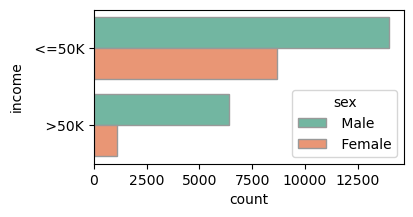

In [110]:
# comparison in terms of gender
fig,ax = plt.subplots(1,1,figsize=(4,2))
sns.countplot(data = data , y='income',hue = 'sex',palette='Set2',edgecolor=".6",ax=ax)

<Axes: xlabel='count', ylabel='occupation'>

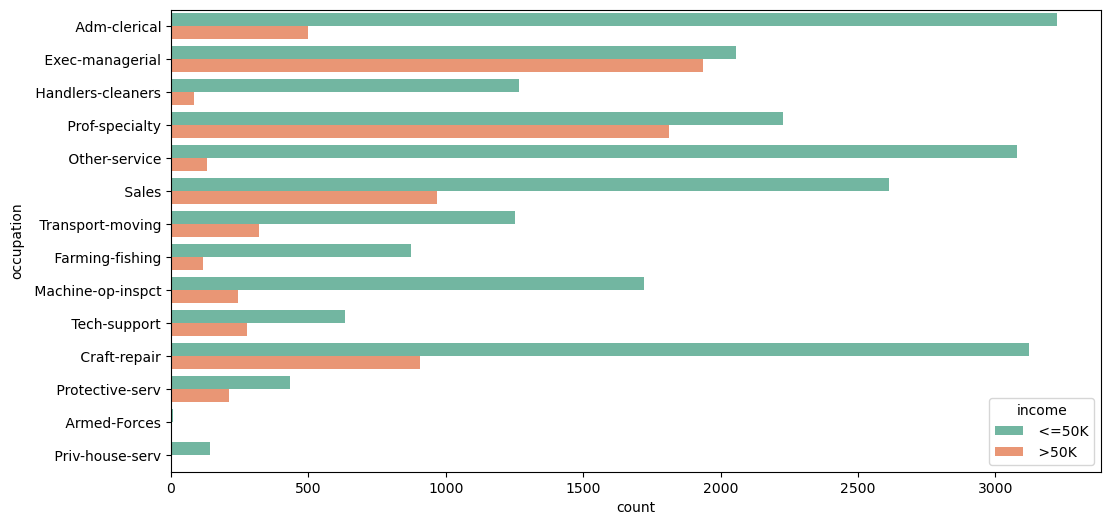

In [111]:
# comparison in terms of occupation
fig,ax = plt.subplots(1,1,figsize=(12,6))
sns.countplot(data = data , y='occupation',hue = 'income',palette='Set2',ax=ax)

<Axes: xlabel='count', ylabel='race'>

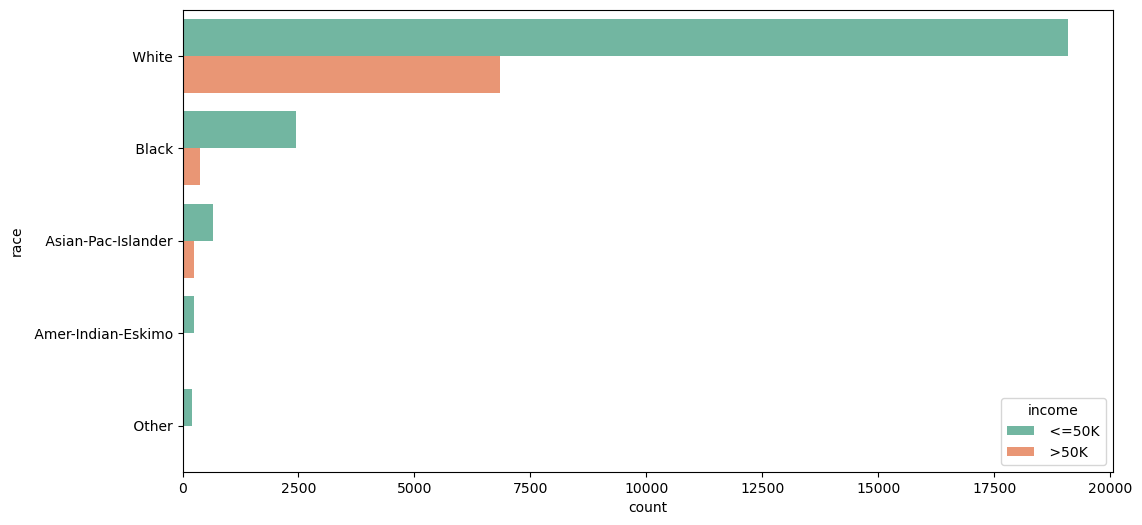

In [112]:
# comparison in terms of race
fig,ax = plt.subplots(1,1,figsize=(12,6))
sns.countplot(data = data , y='race',hue = 'income',palette='Set2',ax=ax)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

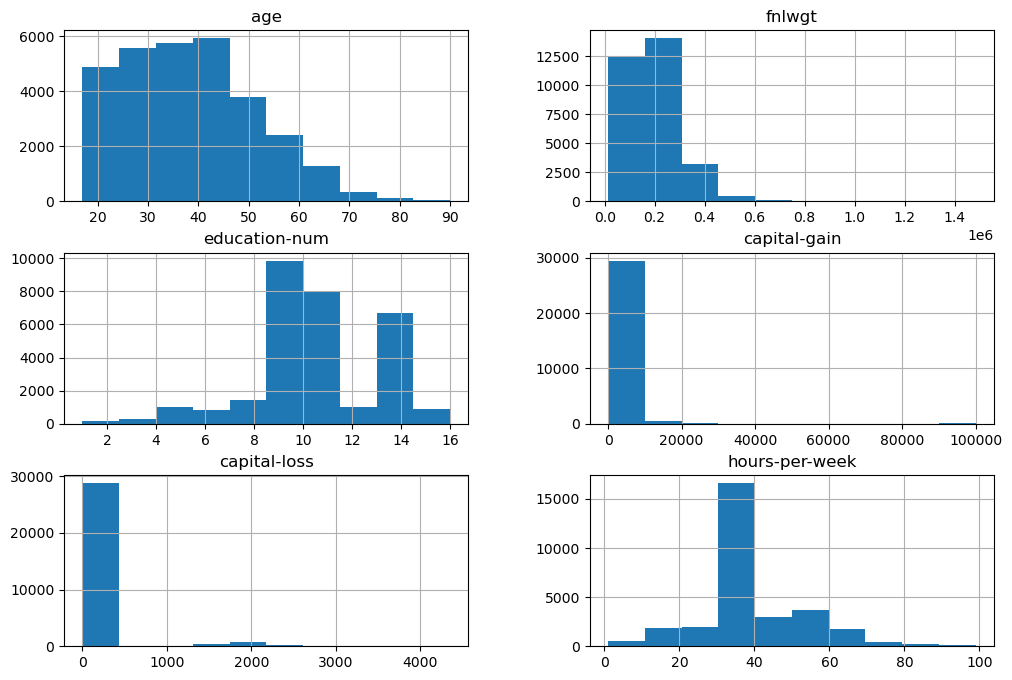

In [113]:
# plot the distribution of the continuous variable
data[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].hist(figsize=(12,8))

### 2.3 Prep data for training

#### Encode categorical variables to numbers (0, 1)

In [114]:
## Create a new dataframe with only the numerical data
data_num = data[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]

In machine learning, we often want to convert categorical variables to numerical dummy variables. 

In [115]:
# Convert categorical variables to numerical
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

dummy_df_list = []
for col in categorical_cols:
    
    dummy_df = pd.get_dummies(data[col], prefix=col) 
    # prefix: adds the original column name as a prefix to each dummy variable's column name
    
    # pd.concat() combines the list of dummy dataframes into a single dataframe
    dummy_df_list.append(dummy_df)

data_dummy = pd.concat(dummy_df_list, axis=1)

In [116]:
data_dummy

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
32557,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
32558,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
32559,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [117]:
# concatenate the data_num and data_dummy
data_new = pd.concat([data_num, data_dummy], axis=1)

In [118]:
data_new.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [120]:
## We are going to set all the non-income columns as X
# returns all column names except the specified ones
X = data_new[data_new.columns.difference(['income_ >50K', 'income_ <=50K'])]
y = data_new['income_ >50K']

### 2.4 Creating a training and test set

In [156]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets



### 2.5 Training the model


In [157]:
%%time
## We can use %%time to see how long it takes to run the code
## %% are called magic functions in Jupyter Notebook


CPU times: total: 0 ns
Wall time: 0 ns


#### Visualization

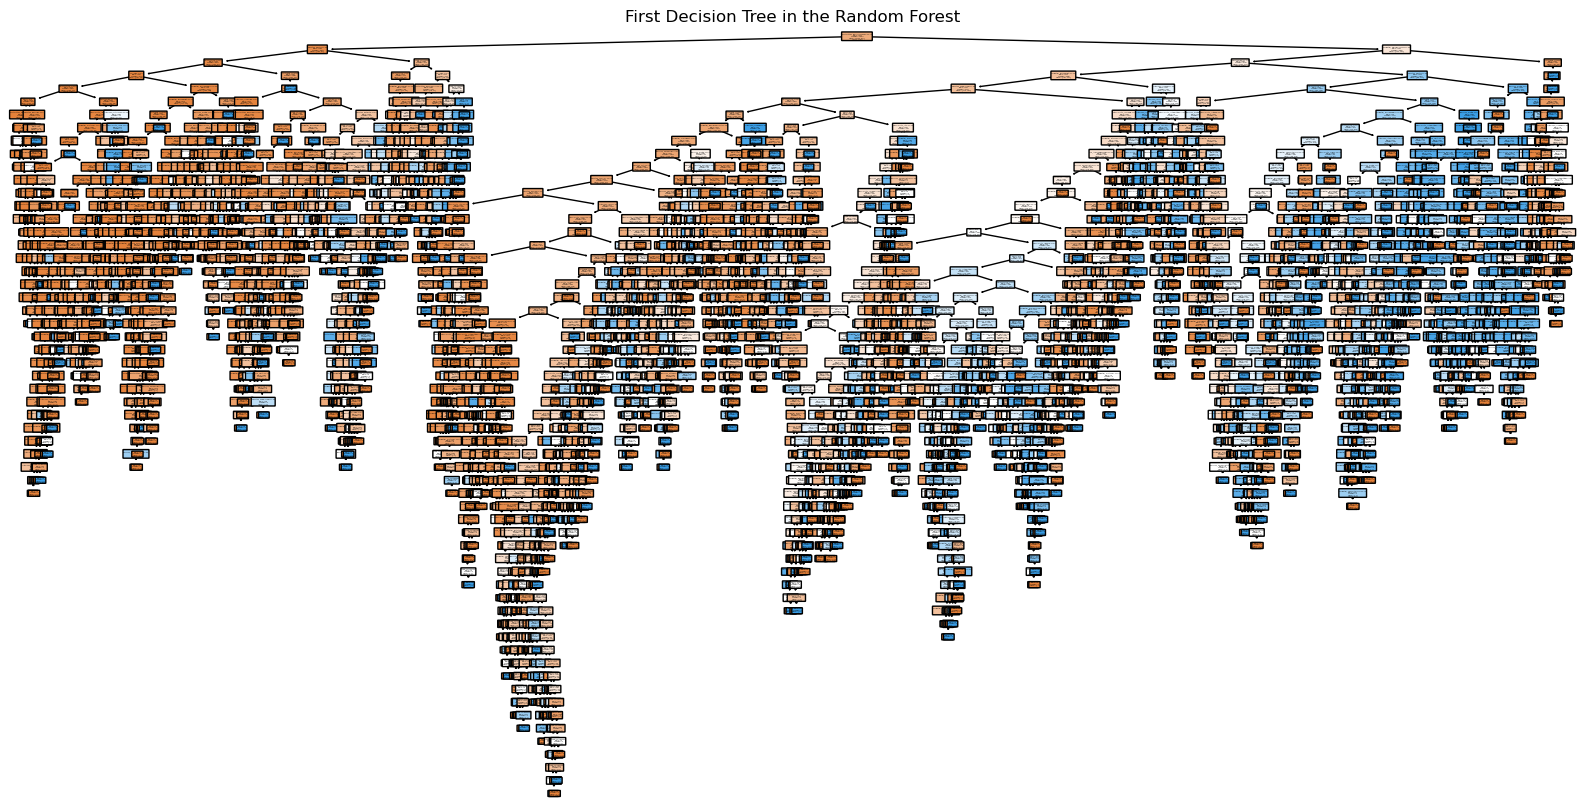

In [90]:
# Visualizing the Tree
# Since we have selected so many features, visualizing the tree structure, even the first one, takes ~4-5 minutes. 

# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# # Assuming you have trained your random forest classifier as rf
# # Extract the first three trees
# # Plotting the first tree
# plt.figure(figsize=(20, 10))
# plot_tree(rf.estimators_[0], filled=True, feature_names=X.columns, class_names=['<=50K', '>50K'], rounded=True)
# plt.title('First Decision Tree in the Random Forest')
# plt.show()

### 2.6 Testing the model

In [158]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", )

Accuracy:


In [159]:
# confusion matrix


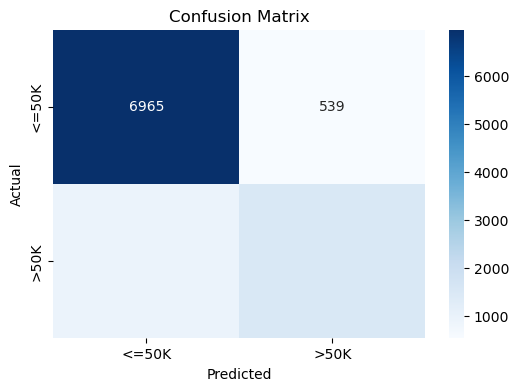

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7504
        >50K       0.74      0.62      0.67      2450

    accuracy                           0.85      9954
   macro avg       0.81      0.77      0.79      9954
weighted avg       0.85      0.85      0.85      9954



In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

## 3. Support Vector Machine (SVM)

In [160]:
# try to build a model using SVM
%%time
## SVC() is a support vector classifier 
## There is also a support vector regressor SVR()


UsageError: Line magic function `%%time` not found.


Notice that took a lot longer to run than the Random Forest. The model performed slightly worse.

In [75]:
# calculate the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7891299979907574


We also have a higher false negative rate, too.

In [128]:
# confusion matrix
confusion_matrix(y_test, y_pred)/len(y_test)

array([[7.53465943e-01, 4.01848503e-04],
       [2.11874623e-01, 3.42575849e-02]])

## 4. Decision Tree

In [129]:
# try to build a model using decision tree
%%time


CPU times: total: 62.5 ms
Wall time: 531 ms


In [130]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8096242716495881


In [131]:
confusion_matrix(y_test, y_pred)/len(y_test)

array([[0.65471167, 0.09915612],
       [0.09121961, 0.1549126 ]])

## 5. KNN

In [132]:
# try to build a model using KNN
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

CPU times: total: 5.7 s
Wall time: 4.76 s


In [133]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.768836648583484


In [134]:
confusion_matrix(y_test, y_pred)/len(y_test)

array([[0.6925859 , 0.0612819 ],
       [0.16988145, 0.07625075]])

# in-class exercise
- Using this same dataset, try to predict gender based on other categories. Which model performed the best and by what metrics (time? accuracy? false predictions?) did you determine this.
- Instead of a 66/33 split, try a 80/20 split on your best performing model. Did this improve your model performance?

